In [405]:
import random
import matplotlib.pyplot as plt
import time
import numpy as np

In [406]:
import numpy as np
import matplotlib.pyplot as plt
import random

class UnsupervisedLearning:
    
    def __init__(self):
        self.data_set = []
        self.alpha = 0.0001

    def ex1(self, plot_flag = False):
        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, 500).T
        plt.plot(a[0], a[1], 'x')
        
        mean = [-3, -3]
        cov = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean, cov, 500).T
        plt.plot(b[0], b[1], 'x')
        
        c = np.concatenate((a, b), axis=1)
        c = c.T
        np.random.shuffle(c)
        c = c.T
        x = c[0]
        y = c[1]


        if plot_flag:
            plt.plot(x, y, 'x')
            plt.axis('equal')
            plt.show()
        
        self.data_set = c

    def generate_data(self):


        mean = [3, 3]
        cov = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean, cov, 500).T
        labels_a = np.ones(500)
        a = np.concatenate((a, labels_a.reshape(1, 500)), axis=0)
        
        mean = [-3, -3]
        cov = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean, cov, 500).T
        labels_b = np.ones(500) * 2
        b = np.concatenate((b, labels_b.reshape(1, 500)), axis=0)

        data = np.concatenate((a, b), axis=1)

        r1 = random.choice(data.T)
        r2 = random.choice(data.T)
        for x in data.T:
            if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                r1 = (1 - self.alpha) * r1 + self.alpha * x
            else:
                r2 = (1 - self.alpha) * r2 + self.alpha * x

        return data, r1, r2

    def adapt_data(self, data, r1, r2):
        r1_values = [r1]
        r2_values = [r2]
        first_passage_r1 = []
        first_passage_r2 = []

        for iter in range(10):
            for x in data.T:
                if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                    r1 = (1 - self.alpha) * r1 + self.alpha * x
                else:
                    r2 = (1 - self.alpha) * r2 + self.alpha * x
            if iter == 0:
                first_passage_r1.append(r1)
                first_passage_r2.append(r2)

            r1_values.append(r1)
            r2_values.append(r2)

        return r1_values, r2_values, first_passage_r1, first_passage_r2
    
    def plot_data(self, data, r1_values, r2_values, first_passage_r1, first_passage_r2):
        plt.scatter(data[0, :], data[1, :], alpha= 0.5)

        r1_values = np.array(r1_values)
        r2_values = np.array(r2_values)

        plt.plot(r1_values[:, 0], r1_values[:, 1], 'rx', label='r1 values')
        plt.plot(r2_values[:, 0], r2_values[:, 1], 'bx', label='r2 values')

        plt.plot(first_passage_r1[0][0], first_passage_r1[0][1], 'ro', label='First passage r1')
        plt.plot(first_passage_r2[0][0], first_passage_r2[0][1], 'bo', label='First passage r2')

        plt.legend()
        plt.show()

    def run(self):
        data, r1, r2 = self.generate_data()
        r1_values, r2_values, first_passage_r1, first_passage_r2 = self.adapt_data(data, r1, r2)
        self.plot_data(data, r1_values, r2_values, first_passage_r1, first_passage_r2)

In [407]:
class UnsupervisedLearning_1b (UnsupervisedLearning):
    
    def adapt_data(self, data, r1, r2):
        r1_values = [r1]
        r2_values = [r2]
        first_passage_r1 = []
        first_passage_r2 = []

        for iter in range(10):
            d1 = np.zeros_like(r1)
            d2 = np.zeros_like(r2)
            for x in data.T:
                if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                    d1 += x - r1
                else:
                    d2 += x - r2
            r1 += (self.alpha / data.shape[1]) * d1
            r2 += (self.alpha / data.shape[1]) * d2

            if iter == 0:
                first_passage_r1.append(r1)
                first_passage_r2.append(r2)

            r1_values.append(r1)
            r2_values.append(r2)

        return r1_values, r2_values, first_passage_r1, first_passage_r2
    
    def plot_data(self, data, r1_values, r2_values, first_passage_r1, first_passage_r2):
        plt.scatter(data[0, :], data[1, :], alpha =0.5)

        r1_values = np.array(r1_values)
        r2_values = np.array(r2_values)

        # Plot the consecutive positions of r1 and r2
        plt.plot(r1_values[:, 0], r1_values[:, 1], 'r-', label='r1 path')
        plt.plot(r2_values[:, 0], r2_values[:, 1], 'b-', label='r2 path')

        plt.plot(first_passage_r1[0][0], first_passage_r1[0][1], 'ro', label='First passage r1')
        plt.plot(first_passage_r2[0][0], first_passage_r2[0][1], 'bo', label='First passage r2')

        plt.legend()
        plt.show()

    def plot_clusters(self, data, r1, r2):
        import matplotlib.patches as mpatches

        colors = ['r', 'g', 'b', 'y', 'c', 'm']
        labels = ['points closer to r1 labeled 1', 'points closer to r1 labeled 2',
                  'points closer to r2 labeled 1', 'points closer to r2 labeled 2',
                  'centroid r1', 'centroid r2']

        patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]

        for x in data.T:
            if np.linalg.norm(x[:-1] - r1[:-1]) < np.linalg.norm(x[:-1] - r2[:-1]):
                if x[-1] == 1:
                    plt.plot(x[0], x[1], colors[0]+'o')
                else:
                    plt.plot(x[0], x[1], colors[1]+'o')
            else:
                if x[-1] == 1:
                    plt.plot(x[0], x[1], colors[2]+'o')
                else:
                    plt.plot(x[0], x[1], colors[3]+'o')

        plt.plot(r1[0], r1[1], colors[4]+'x')
        plt.plot(r2[0], r2[1], colors[5]+'x')

        plt.legend(handles=patches)
        plt.show()


    def run(self):
        data, r1, r2 = self.generate_data()
        r1_values, r2_values, first_passage_r1, first_passage_r2 = self.adapt_data(data, r1, r2)
        self.plot_data(data, r1_values, r2_values, first_passage_r1, first_passage_r2)
        self.plot_clusters(data, r1, r2)

    def repeat_experiment(self):
            final_r1_values = []
            final_r2_values = []

            for _ in range(30):
                # Run the experiment and get the final values of r1 and r2
                data, r1, r2 = self.generate_data()
                r1_values, r2_values, first_passage_r1, first_passage_r2 = self.adapt_data(data, r1, r2)
                final_r1 = r1_values[-1]
                final_r2 = r2_values[-1]
                final_r1_values.append(final_r1)
                final_r2_values.append(final_r2)

            # Convert the lists to numpy arrays for easier manipulation
            final_r1_values = np.array(final_r1_values)
            final_r2_values = np.array(final_r2_values)

            # Plot the main dataset
            plt.scatter(data[0, :], data[1, :], alpha=0.5)

            # Plot the final values of r1 and r2
            plt.scatter(final_r1_values[:, 0], final_r1_values[:, 1], color='r', label='final values of r1')
            plt.scatter(final_r2_values[:, 0], final_r2_values[:, 1], color='b', label='final values of r2')
            plt.legend()
            plt.show()

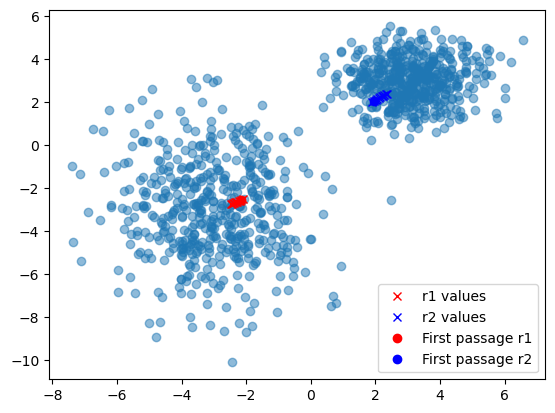

In [408]:
if __name__ == "__main__":
    # np.random.seed(2137) 
    learner = UnsupervisedLearning()
    # learner.ex1(plot_flag= True)
    # a)
    learner.run()

   

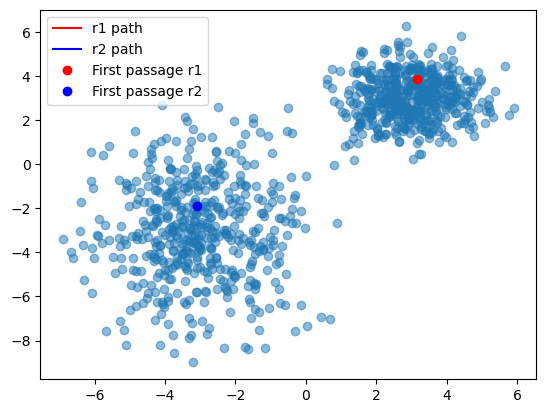

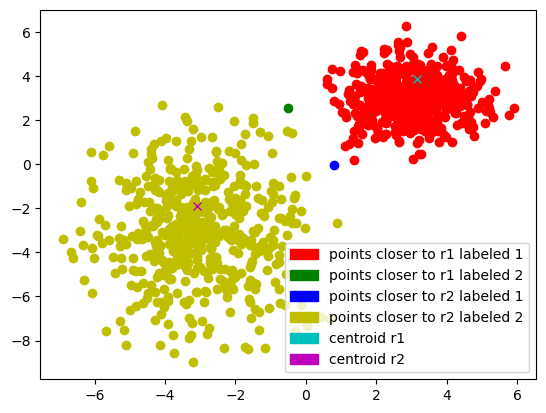

In [409]:
 # b)
learner = UnsupervisedLearning_1b()
learner.run()

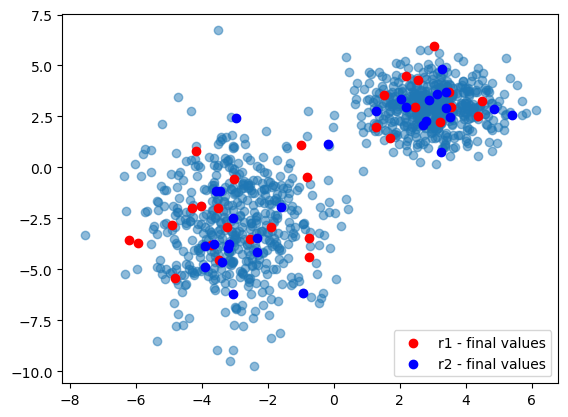

In [410]:
learner.repeat_experiment()